In [2]:
!pip install opendatasets
!pip install pandas

Konteks Dataset

Dataset ini kemungkinan merupakan data surveilans varian COVID-19 yang dikumpulkan dari berbagai negara. Tujuannya untuk memantau penyebaran varian virus, pertumbuhan kasus, dan dampak mortalitas.

In [3]:
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/lumierebatalong/covid-19-variants-survival-data/data?select=surv_variants.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: staenly
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/lumierebatalong/covid-19-variants-survival-data


100%|██████████| 212k/212k [00:00<00:00, 60.0MB/s]

In [4]:
import numpy as np
import pandas as pd
df = pd.read_csv("/content/covid-19-variants-survival-data/surv_variants.csv")
df.head()

,Country,first_seq,num_seqs,last_seq,variant,censure_date,duration,censored,mortality_rate,total_cases,total_deaths,growth_rate
0,China,2019-10-22,3,2020-06-03,S.Q677,2020-06-21,225,True,0.052983,18259.460123,967.435583,16447.430706
1,USA,2020-03-03,26022,2021-11-19,S.Q677,2020-11-01,626,False,0.016111,256577.596234,4133.841031,84748.745876
2,Brazil,2020-03-09,1553,2021-11-12,S.Q677,2020-11-07,613,False,0.027846,101550.140466,2827.764288,42356.907426
3,Australia,2020-03-20,88,2021-11-14,S.Q677,2020-11-18,604,False,0.009905,1402.239579,13.889752,1227.122500
4,Sweden,2020-03-20,810,2021-11-19,S.Q677,2020-11-18,609,False,0.012711,1659.148728,21.089425,2521.042925


In [5]:
# Cek tipe data dan missing values
print("\nInformasi dataset:")
print(df.info())

# Statistik deskriptif
print("\nStatistik deskriptif:")
print(df.describe())


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4113 entries, 0 to 4112
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         4113 non-null   object 
 1   first_seq       4113 non-null   object 
 2   num_seqs        4113 non-null   int64  
 3   last_seq        4113 non-null   object 
 4   variant         4113 non-null   object 
 5   censure_date    4113 non-null   object 
 6   duration        4113 non-null   int64  
 7   censored        4113 non-null   bool   
 8   mortality_rate  4113 non-null   float64
 9   total_cases     4113 non-null   float64
 10  total_deaths    4113 non-null   float64
 11  growth_rate     3585 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(5)
memory usage: 357.6+ KB
None

Statistik deskriptif:
           num_seqs     duration  mortality_rate   total_cases   total_deaths  \
count  4.113000e+03  4113.000000     4113.000000  4.113000e+0

In [6]:
#1. Data Overview
print("="*50)
print("1. Data Overview")
print("="*50)
print(f"Shape: {df.shape}")
print("\n5 samples:")
print(df.sample(5))
print("\nColums:")
print(df.dtypes)

1. Data Overview
Shape: (4113, 12)

5 samples:
         Country   first_seq  num_seqs    last_seq   variant censure_date  \
1558     Ecuador  2021-01-04       412  2021-09-20  21F.Iota   2021-09-04   
3106  Luxembourg  2020-03-26      1598  2021-08-05    S.S477   2020-11-24   
3073  Cabo Verde  2020-11-25         5  2021-02-02   20A.EU2   2021-07-26   
3298     Ukraine  2020-12-29       120  2021-09-16    S.H69-   2021-08-29   
1981    Slovenia  2021-02-27         4  2021-10-13    S.Y145   2021-10-28   

      duration  censored  mortality_rate    total_cases  total_deaths  \
1558       259     False        0.064427   21541.944931   1387.892338   
3106       497     False        0.011103    1811.375836     20.112296   
3073        69      True        0.009469    1444.081633     13.673469   
3298       261     False        0.023875  207121.530829   4945.088590   
1981       228      True        0.015213      11.211289      0.170559   

      growth_rate  
1558  1245.080152  
3106   183.

In [7]:
# 2. Basic Statistics
print("\n" + "="*50)
print("2. Basic Statistics")
print("="*50)
print("\nNumerical Features:")
print(df.describe().T)
print("\nCategorical Features:")
print(df[['variant', 'Country', 'censored']].describe(include='object').T)


2. Basic Statistics

Numerical Features:
                 count           mean           std       min         25%  \
num_seqs        4113.0    4216.427912  3.971929e+04  1.000000    4.000000   
duration        4113.0     182.552638  1.619509e+02  0.000000   39.000000   
mortality_rate  4113.0       0.019360  1.450404e-02  0.000000    0.010835   
total_cases     4113.0  119831.574118  1.027564e+06  0.000202  134.960317   
total_deaths    4113.0    2118.266613  1.580169e+04  0.000000    1.948052   
growth_rate     3585.0   11682.192504  4.152451e+04  0.000000  154.923372   

                        50%           75%           max  
num_seqs          30.000000    270.000000  1.289311e+06  
duration         155.000000    280.000000  6.690000e+02  
mortality_rate     0.016106      0.024168  1.453305e-01  
total_cases     1280.419355  14350.056924  3.597978e+07  
total_deaths      20.188889    248.201653  5.137903e+05  
growth_rate      882.398620   3827.861639  6.004124e+05  

Categorical

In [8]:
# 3. Temporal Analysis
print("\n" + "="*50)
print("3. Temporal Analysis")
print("="*50)

# Convert to datetime
date_cols = ['first_seq', 'last_seq', 'censure_date']
df[date_cols] = df[date_cols].apply(pd.to_datetime)

# Time range analysis
print(f"\nDate Ranges:")
print(f"First Sequence: {df['first_seq'].min()} to {df['first_seq'].max()}")
print(f"Last Sequence: {df['last_seq'].min()} to {df['last_seq'].max()}")



3. Temporal Analysis

Date Ranges:
First Sequence: 2019-10-22 00:00:00 to 2021-11-28 00:00:00
Last Sequence: 2020-03-03 00:00:00 to 2021-11-28 00:00:00


<Figure size 1800x1200 with 0 Axes>

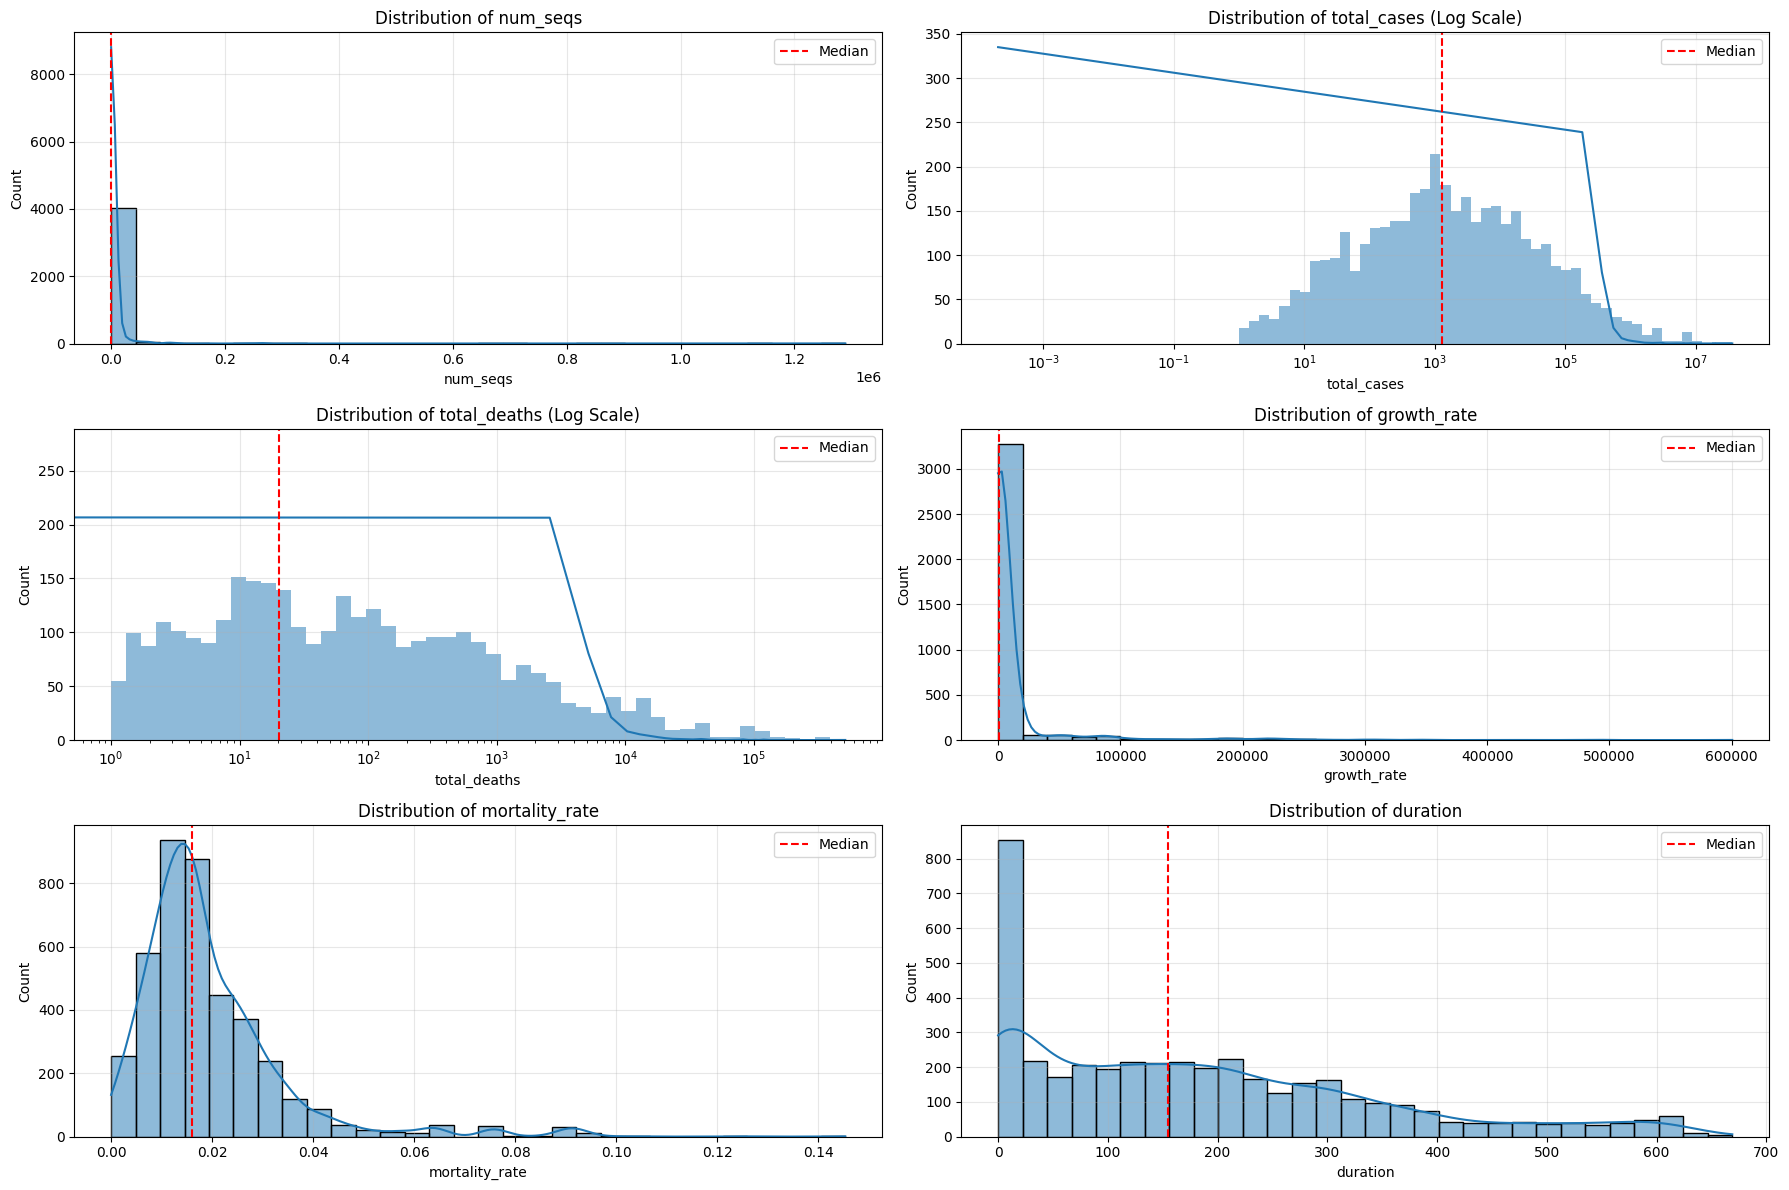

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# 4. Distribution Analysis
plt.figure(figsize=(18, 12))

# Numerical features
plt.figure(figsize=(18, 12))
num_cols = ['num_seqs', 'total_cases', 'total_deaths', 'growth_rate', 'mortality_rate', 'duration']

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)  # Menggunakan 3 baris x 2 kolom untuk layout lebih baik

    # Gunakan log scale untuk kolom dengan range sangat besar
    if col in ['total_cases', 'total_deaths']:
        log_bins = np.logspace(np.log10(df[col].min()+1),
                              np.log10(df[col].max()),
                              50)
        sns.histplot(df[col], bins=log_bins, kde=True)
        plt.xscale('log')
        plt.title(f'Distribution of {col} (Log Scale)')

    # Untuk distribusi dengan nilai desimal kecil
    elif col in ['num_seqs', 'growth_rate', 'mortality_rate']:
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f'Distribution of {col}')

    # Untuk durasi
    else:
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f'Distribution of {col}')

    plt.axvline(df[col].median(), color='r', linestyle='--', label='Median')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# **Preprocessing**

In [10]:
# Data Cleaning
# Handle missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
Country             0
first_seq           0
num_seqs            0
last_seq            0
variant             0
censure_date        0
duration            0
censored            0
mortality_rate      0
total_cases         0
total_deaths        0
growth_rate       528
dtype: int64


In [11]:
# Cek pola missing values
missing_growth = df[df['growth_rate'].isnull()]

# Analisis distribusi negara dan varian pada data yang hilang
print("Distribusi Negara dengan Missing Growth Rate:")
print(missing_growth['Country'].value_counts().head(10))

print("\nDistribusi Varian dengan Missing Growth Rate:")
print(missing_growth['variant'].value_counts().head(5))

Distribusi Negara dengan Missing Growth Rate:
Country
El Salvador      8
India            8
Iceland          8
Morocco          7
Russia           7
Brazil           7
Liechtenstein    7
Belgium          7
Uzbekistan       7
Georgia          7
Name: count, dtype: int64

Distribusi Varian dengan Missing Growth Rate:
variant
20A.EU1          22
S.A222           20
DanishCluster    19
S.H655           19
21A.Delta        19
Name: count, dtype: int64


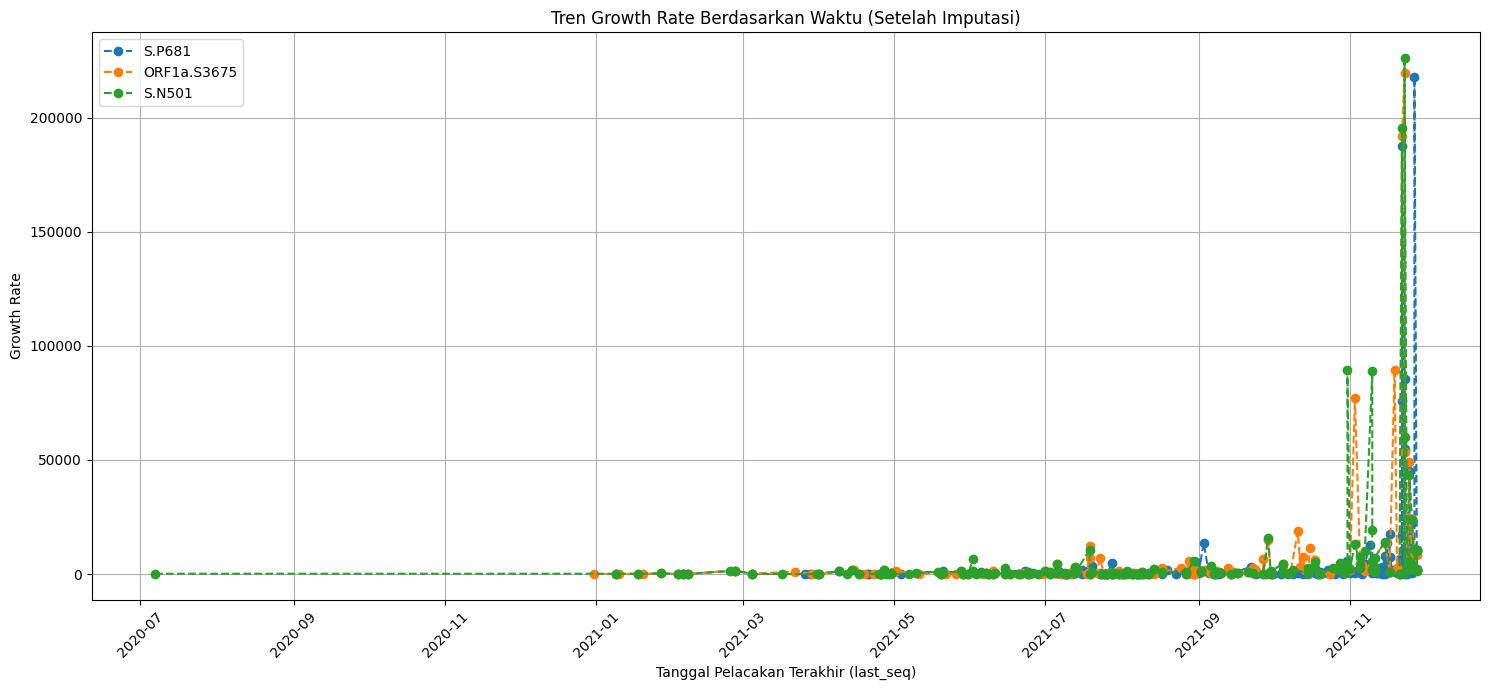

Proses selesai. Dataset telah diimputasi dengan:
- 0 missing values tersisa
- Tipe data teroptimasi:
last_seq          datetime64[ns]
Country                 category
first_seq         datetime64[ns]
num_seqs                   int32
variant                 category
censure_date      datetime64[ns]
duration                   int32
censored                    int8
mortality_rate           float32
total_cases                int32
total_deaths               int32
growth_rate              float32
dtype: object


In [12]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Load data dan buat dataframe terpisah
df_imputed = df.copy()

# ================================================
# 1. KONVERSI TIPE DATA & PREPROCESSING TEMPORAL
# ================================================
# Konversi kolom tanggal ke datetime
date_cols = ['first_seq', 'last_seq', 'censure_date']
df_imputed[date_cols] = df_imputed[date_cols].apply(pd.to_datetime, errors='coerce')

# Set last_seq sebagai DatetimeIndex dan urutkan
df_imputed = df_imputed.set_index('last_seq').sort_index()

# ================================================
# 2. IMPUTASI BERHIERARKI DENGAN TIME-BASED INTERPOLATION
# ================================================
# Level 1: Median per kelompok (Negara + Varian)
df_imputed['growth_rate'] = df_imputed.groupby(
    ['Country', pd.Grouper(freq='ME'), 'variant']  # Group by bulan
)['growth_rate'].transform(
    lambda x: x.fillna(x.median())
)

# Level 2: Interpolasi temporal per varian (menggunakan DatetimeIndex)
df_imputed['growth_rate'] = df_imputed.groupby('variant')['growth_rate'].transform(
    lambda x: x.interpolate(method='time').ffill().bfill()
)

# ================================================
# 3. POST-PROCESSING & VALIDASI
# ================================================
# Reset index untuk operasi berikutnya
df_imputed = df_imputed.reset_index()

# Level 3: Hitung ulang dari total_cases dan duration
mask = df_imputed['growth_rate'].isna() & (df_imputed['duration'] > 0)
df_imputed.loc[mask, 'growth_rate'] = (
    df_imputed.loc[mask, 'total_cases'] /
    df_imputed.loc[mask, 'duration']
)

# Level 4: Iterative Imputer multivariat
imputer = IterativeImputer(
    max_iter=10,
    random_state=42,
    skip_complete=True
)
df_imputed[['growth_rate', 'mortality_rate', 'total_cases']] = imputer.fit_transform(
    df_imputed[['growth_rate', 'mortality_rate', 'total_cases']]
)

# ================================================
# 4. KONVERSI TIPE DATA FINAL
# ================================================
# Konversi ke tipe data optimal
type_spec = {
    'Country': 'category',
    'variant': 'category',
    'num_seqs': 'int32',
    'duration': 'int32',
    'censored': 'int8',
    'mortality_rate': 'float32',
    'total_cases': 'int32',
    'total_deaths': 'int32',
    'growth_rate': 'float32'
}

df_imputed = df_imputed.astype(type_spec)

# ================================================
# 5. VISUALISASI TEMPORAL
# ================================================
plt.figure(figsize=(15, 7))

# Ambil 3 varian dominan
top_variants = df_imputed['variant'].value_counts().index[:3]

for variant in top_variants:
    variant_data = df_imputed[df_imputed['variant'] == variant]
    plt.plot(
        variant_data['last_seq'],
        variant_data['growth_rate'],
        label=str(variant),
        marker='o',
        linestyle='--'
    )

plt.title('Tren Growth Rate Berdasarkan Waktu (Setelah Imputasi)')
plt.xlabel('Tanggal Pelacakan Terakhir (last_seq)')
plt.ylabel('Growth Rate')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ================================================
# 6. EKSPOR DATA
# ================================================
df_imputed.to_csv("surv_variants_optimized.csv", index=False)

print("Proses selesai. Dataset telah diimputasi dengan:")
print(f"- {df_imputed['growth_rate'].isna().sum()} missing values tersisa")
print(f"- Tipe data teroptimasi:\n{df_imputed.dtypes}")

In [13]:
df_imputed.head()

,last_seq,Country,first_seq,num_seqs,variant,censure_date,duration,censored,mortality_rate,total_cases,total_deaths,growth_rate
0,2020-03-03,New Zealand,2020-03-03,1,DanishCluster,2020-11-01,0,1,0.000000,0,0,0.000000
1,2020-03-23,New Zealand,2020-03-23,1,S.T572,2020-11-21,0,1,0.000000,0,0,0.000000
2,2020-04-03,Fiji,2020-04-03,1,S.H655,2020-12-02,0,1,0.000000,0,0,2708.335938
3,2020-05-18,United Arab Emirates,2020-05-18,1,S.Y145,2021-01-16,0,1,0.009260,8,0,0.000000
4,2020-05-25,China,2019-10-22,2,S.Q677H.Mockingbird,2020-06-21,216,1,0.053091,12148,644,18381.460938


In [14]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4113 entries, 0 to 4112
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   last_seq        4113 non-null   datetime64[ns]
 1   Country         4113 non-null   category      
 2   first_seq       4113 non-null   datetime64[ns]
 3   num_seqs        4113 non-null   int32         
 4   variant         4113 non-null   category      
 5   censure_date    4113 non-null   datetime64[ns]
 6   duration        4113 non-null   int32         
 7   censored        4113 non-null   int8          
 8   mortality_rate  4113 non-null   float32       
 9   total_cases     4113 non-null   int32         
 10  total_deaths    4113 non-null   int32         
 11  growth_rate     4113 non-null   float32       
dtypes: category(2), datetime64[ns](3), float32(2), int32(4), int8(1)
memory usage: 216.9 KB


In [15]:
# Data Cleaning
# Handle missing values
print("Missing values before cleaning:")
print(df_imputed.isnull().sum())

Missing values before cleaning:
last_seq          0
Country           0
first_seq         0
num_seqs          0
variant           0
censure_date      0
duration          0
censored          0
mortality_rate    0
total_cases       0
total_deaths      0
growth_rate       0
dtype: int64


# **Eksploratory Data Analysis (EDA)**

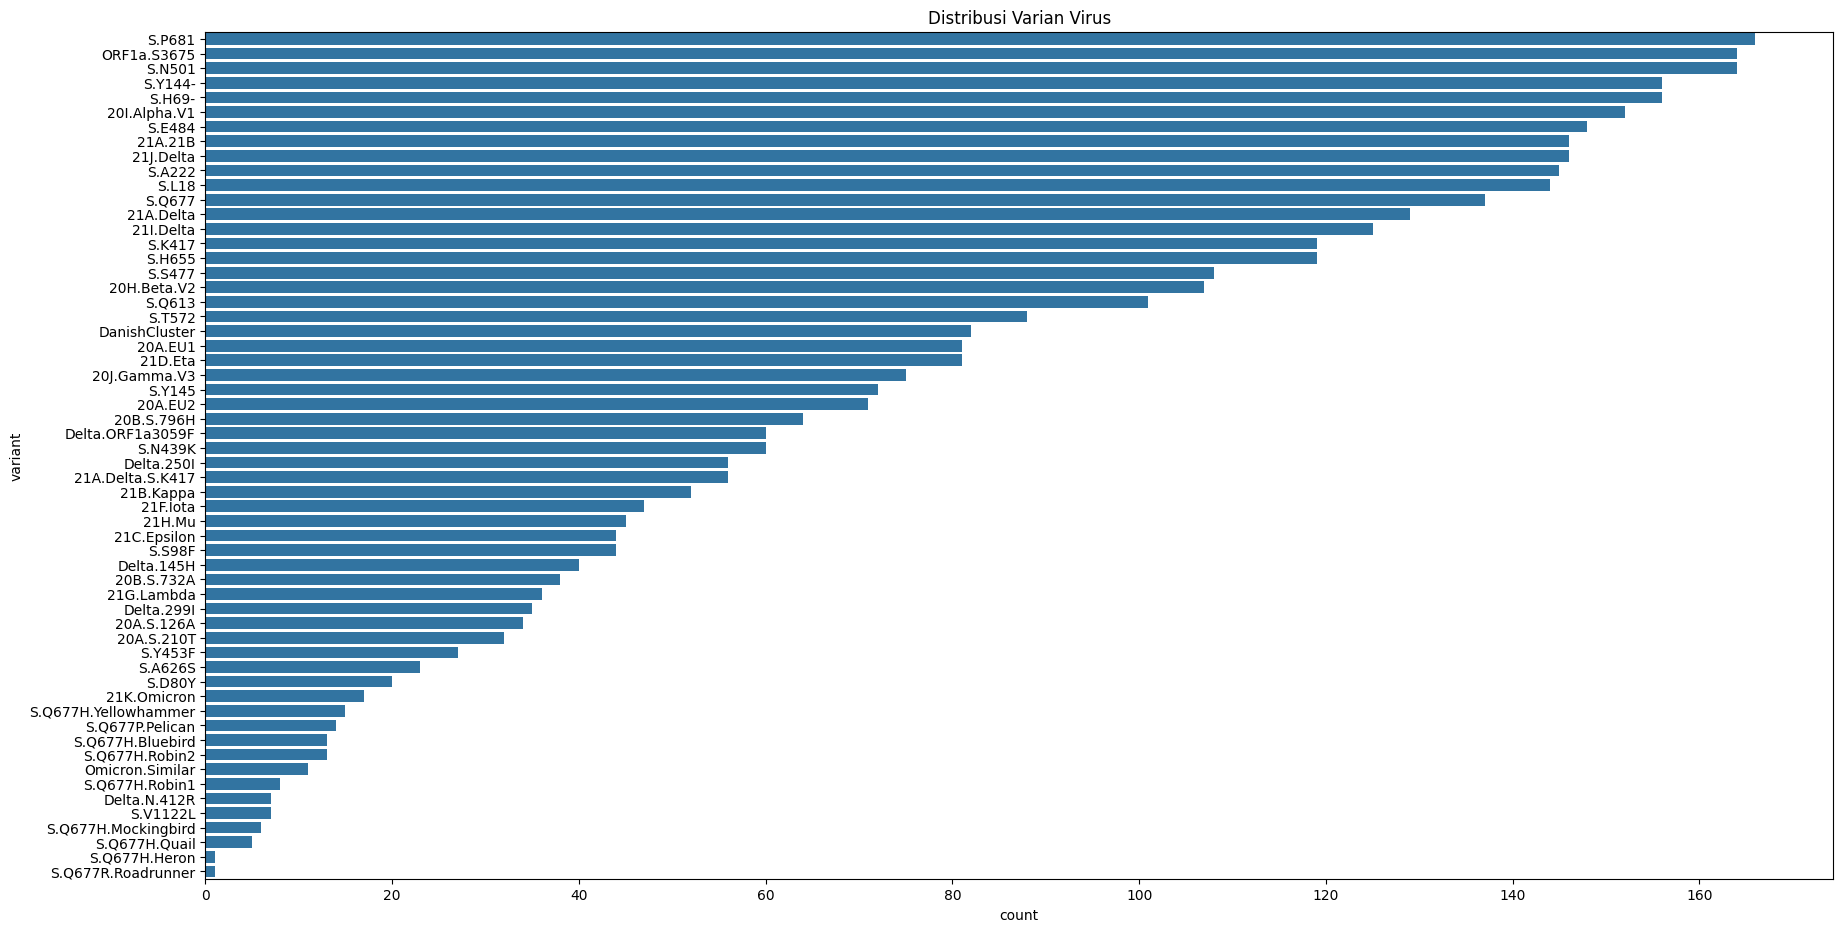

In [16]:
plt.figure(figsize=(21, 11))
sns.countplot(data=df_imputed, y="variant", order=df_imputed["variant"].value_counts().index)
plt.title("Distribusi Varian Virus")
plt.show()

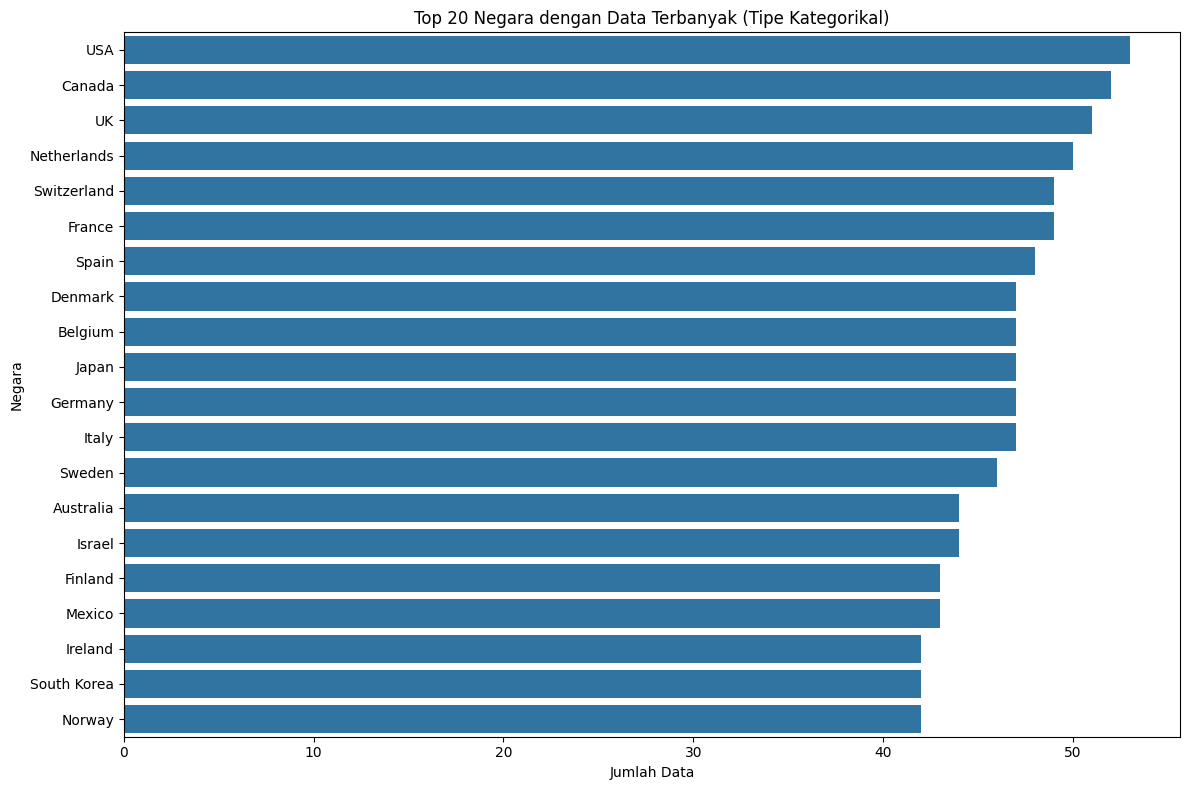

In [17]:
# Ambil data dan pastikan Country adalah kategori
top_countries = df_imputed["Country"].value_counts().head(20)

# Konversi index (nama negara) ke string untuk menghindari masalah kategorikal
top_countries.index = top_countries.index.astype(str)

# Plot dengan kontrol eksplisit pada urutan
plt.figure(figsize=(12, 8))
sns.barplot(
    x=top_countries.values,
    y=top_countries.index,
    order=top_countries.index,  # Pastikan urutan sesuai frekuensi
)
plt.title("Top 20 Negara dengan Data Terbanyak (Tipe Kategorikal)")
plt.xlabel("Jumlah Data")
plt.ylabel("Negara")
plt.tight_layout()
plt.show()

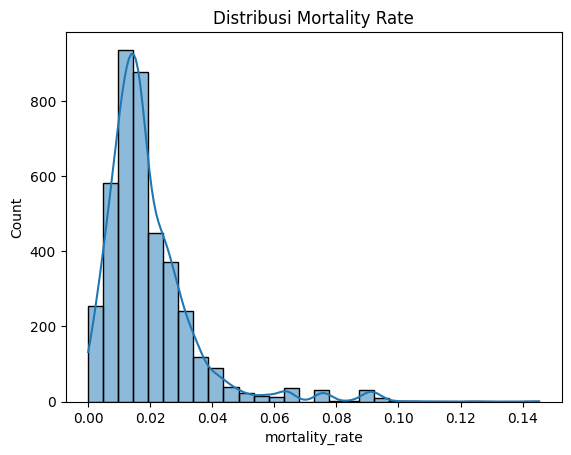

In [18]:
sns.histplot(df_imputed["mortality_rate"], kde=True, bins=30)
plt.title("Distribusi Mortality Rate")
plt.show()

<ipython-input-19-b56338d1d87e>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(plt.FixedFormatter(


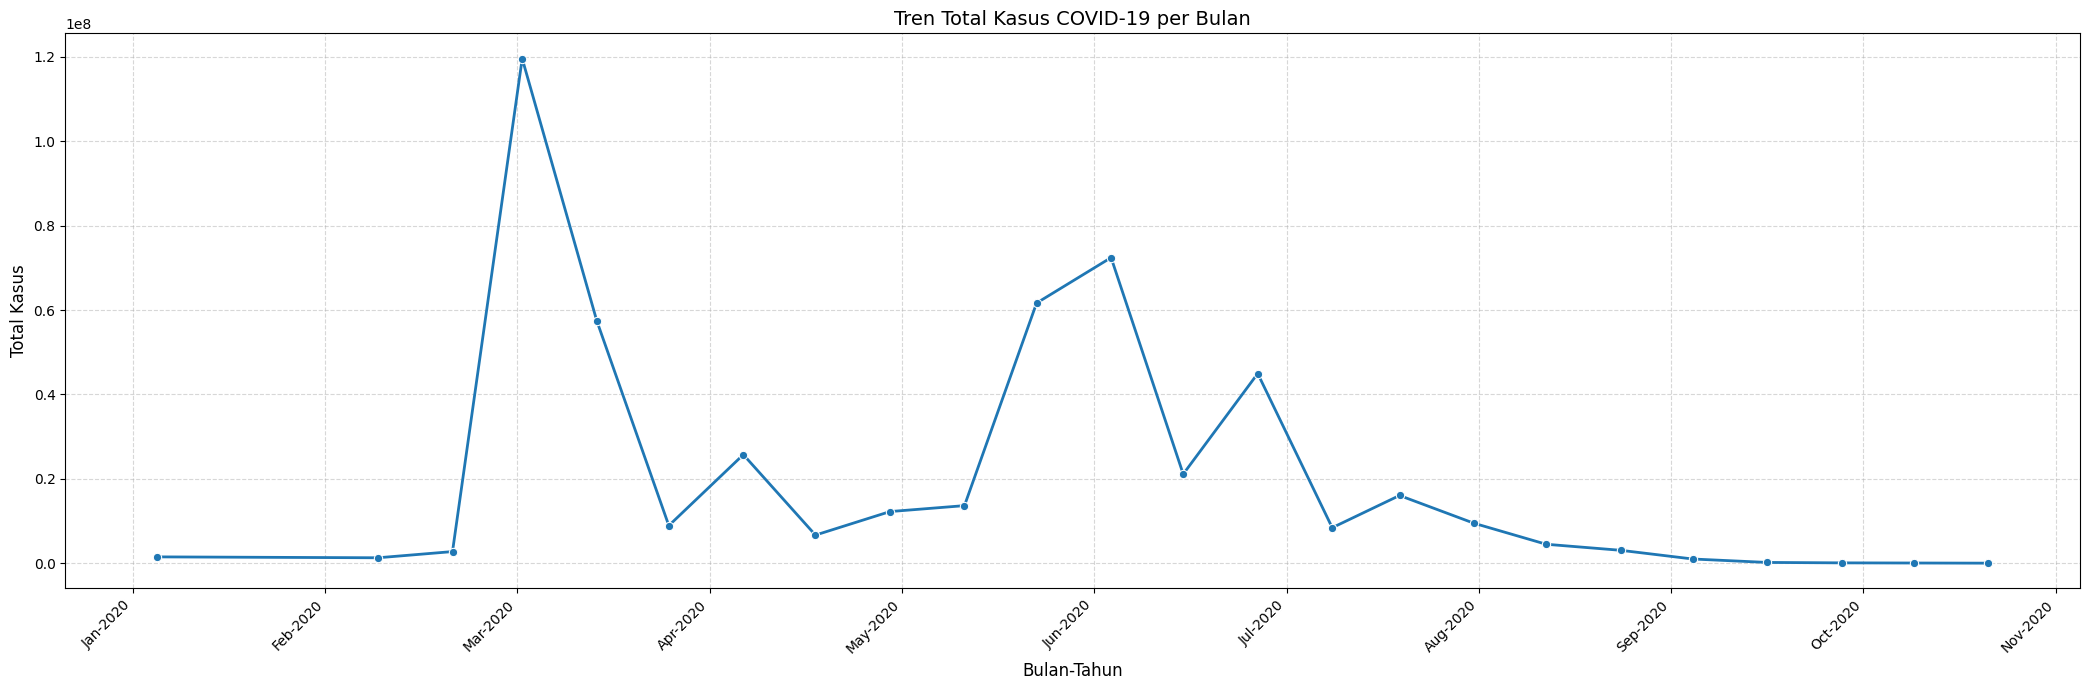

In [19]:
# Konversi Period ke string atau datetime
df_imputed["year_month"] = df_imputed["first_seq"].dt.to_period("M").dt.to_timestamp()  # Convert to datetime
monthly_cases = df_imputed.groupby("year_month")["total_cases"].sum().reset_index()

# Pastikan kolom numerik valid
monthly_cases["total_cases"] = pd.to_numeric(monthly_cases["total_cases"], errors="coerce")

plt.figure(figsize=(21, 7))
ax = sns.lineplot(
    data=monthly_cases,
    x="year_month",
    y="total_cases",
    marker="o",
    linewidth=2
)

# Format tanggal dan label
ax.xaxis.set_major_locator(plt.MaxNLocator(12))  # Batasi 12 label tanggal
ax.xaxis.set_major_formatter(plt.FixedFormatter(
    monthly_cases["year_month"].dt.strftime("%b-%Y")
))

plt.title("Tren Total Kasus COVID-19 per Bulan", fontsize=14)
plt.xlabel("Bulan-Tahun", fontsize=12)
plt.ylabel("Total Kasus", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<ipython-input-20-b88211a66634>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  variant_trend = df_imputed.groupby(["year_month", "variant"]).size().unstack().fillna(0)


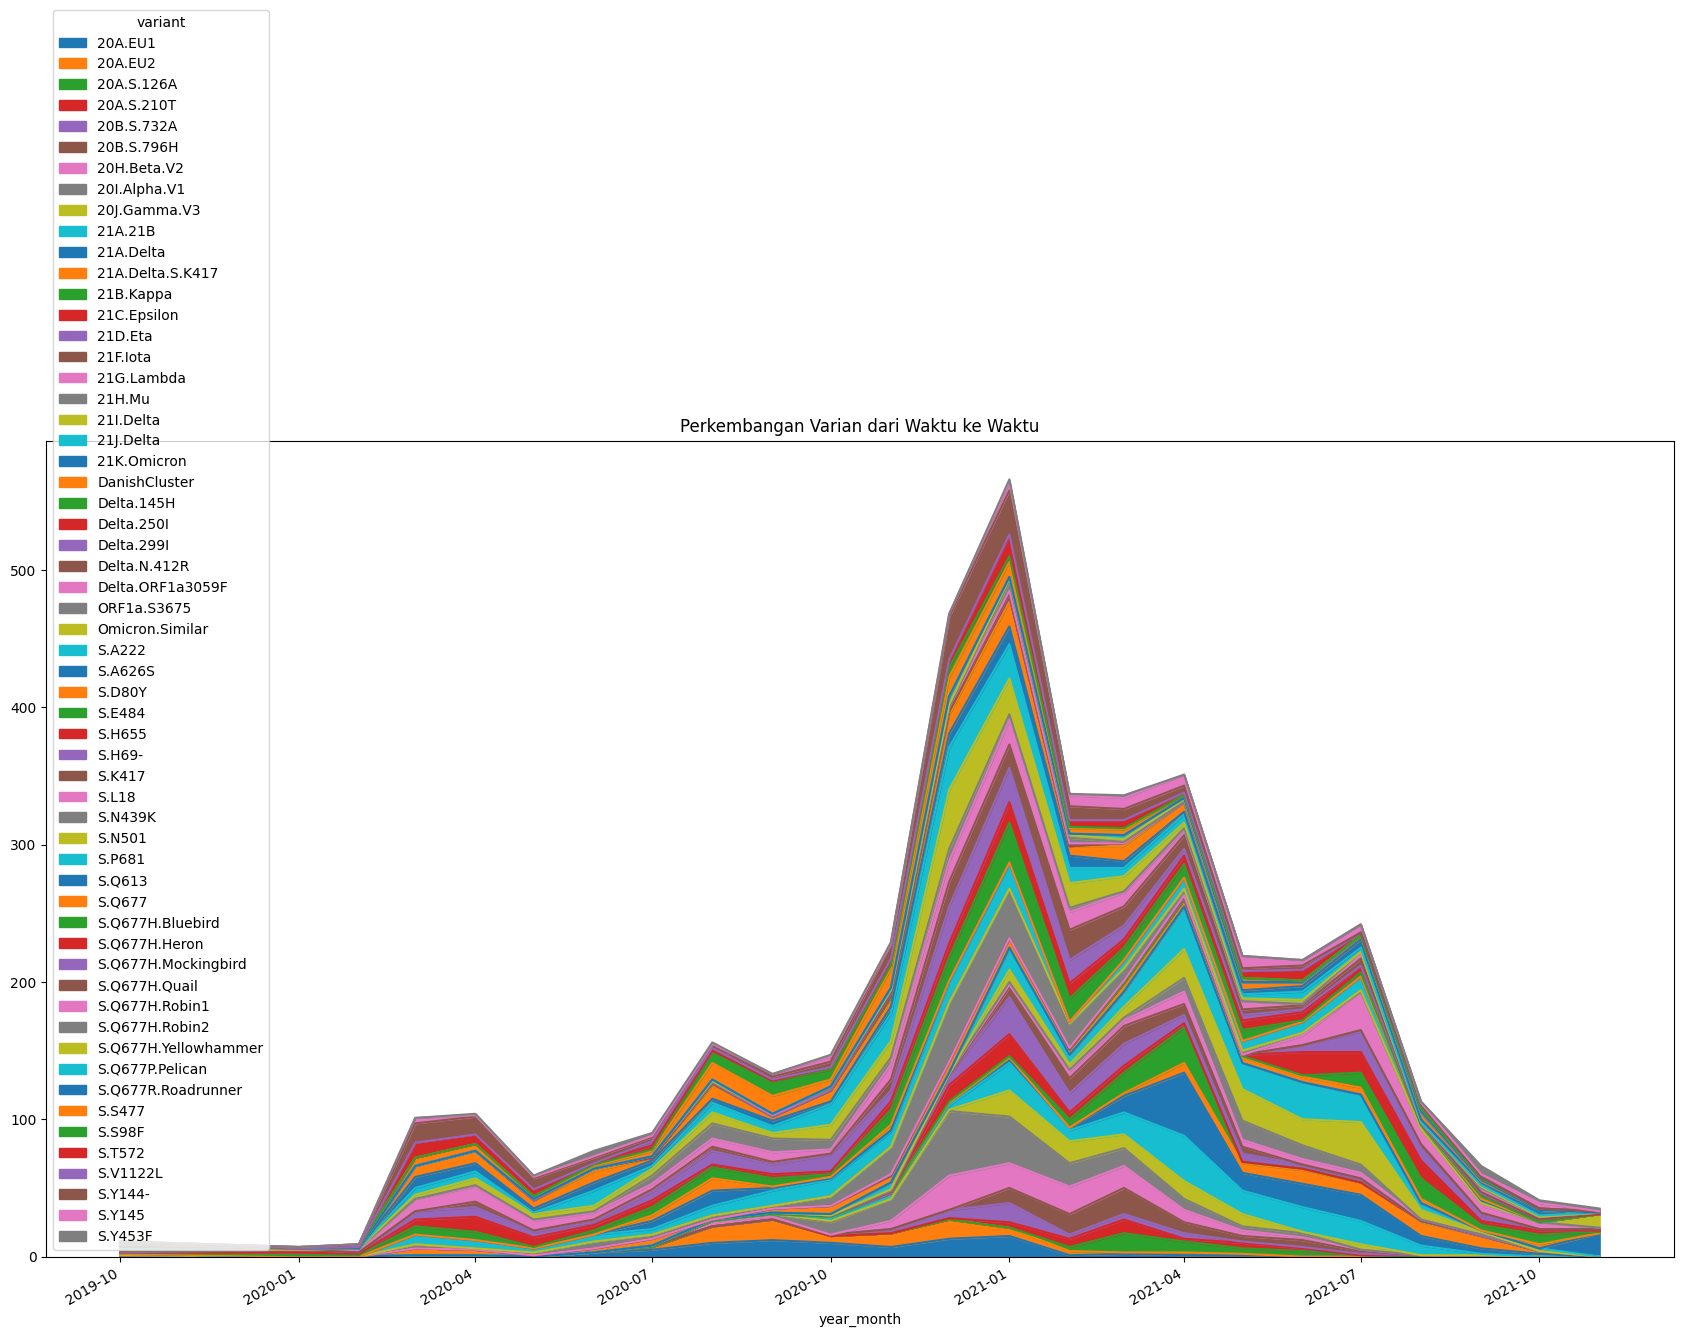

In [20]:
variant_trend = df_imputed.groupby(["year_month", "variant"]).size().unstack().fillna(0)
variant_trend.plot(kind="area", figsize=(21, 12), stacked=True)
plt.title("Perkembangan Varian dari Waktu ke Waktu")
plt.show()

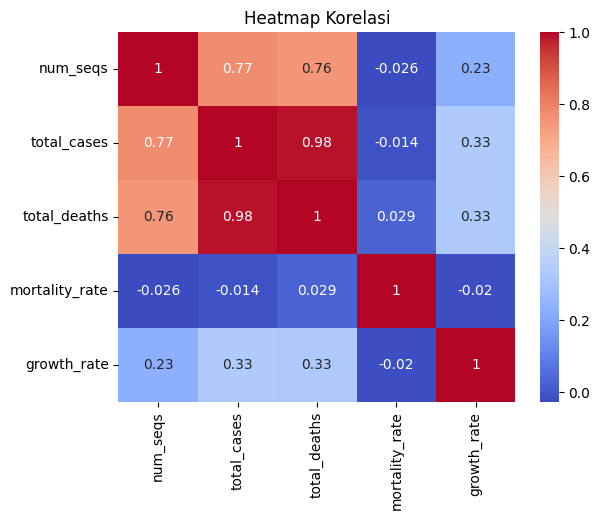

In [21]:
corr_matrix = df[["num_seqs", "total_cases", "total_deaths", "mortality_rate", "growth_rate"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi")
plt.show()

/usr/local/lib/python3.11/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname EU identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


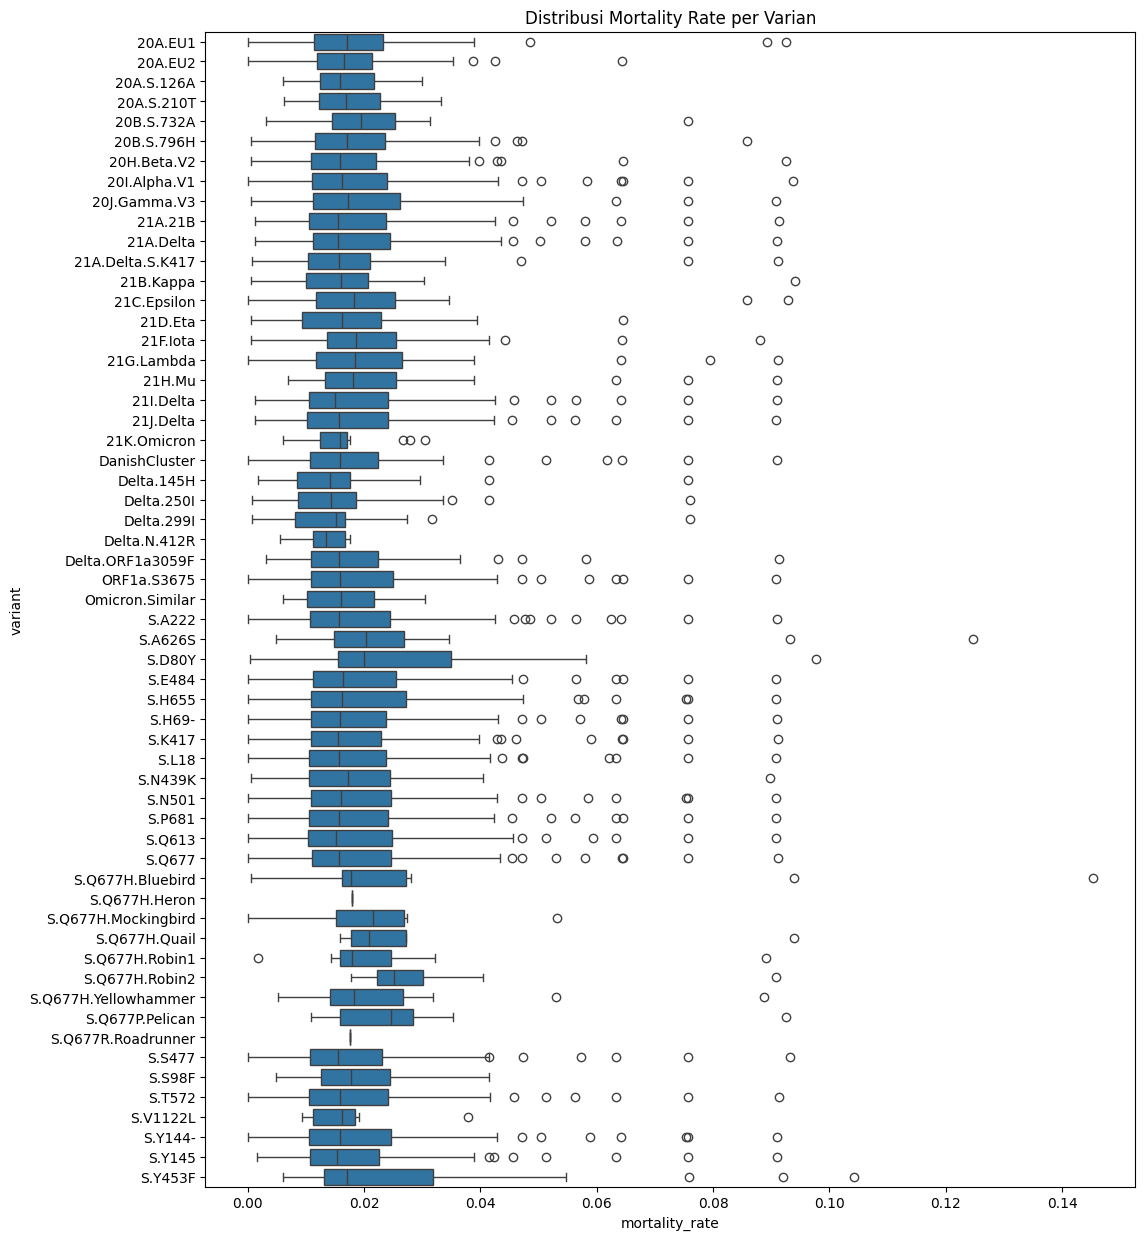

In [22]:
plt.figure(figsize=(12, 15))
sns.boxplot(data=df_imputed, x="mortality_rate", y="variant")
plt.title("Distribusi Mortality Rate per Varian")
plt.show()

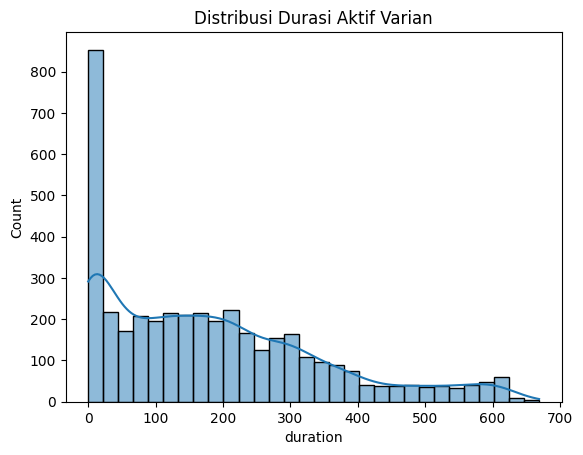

In [23]:
df_imputed["duration"] = (df_imputed["last_seq"] - df_imputed["first_seq"]).dt.days
sns.histplot(df_imputed["duration"], bins=30, kde=True)
plt.title("Distribusi Durasi Aktif Varian")
plt.show()

# **Model Prediksi Mortality Rate COVID dengan XGBoost**

In [32]:
new_df = df_imputed[[
    "first_seq",
    "num_seqs",
    "duration",
    "censored",
    "variant",
    "Country",
    "mortality_rate"
]].copy()


In [33]:
# --------------------------------------------
# 2. ENCODING VARIABEL KATEGORIKAL
# --------------------------------------------
# Label Encoding untuk variant (karena banyak kategori unik)
le_variant = LabelEncoder()
new_df["variant_encoded"] = le_variant.fit_transform(new_df["variant"])
new_df = new_df.drop(columns=["variant"])

# Label Encoding untuk country
le_country = LabelEncoder()
new_df["country_encoded"] = le_country.fit_transform(new_df["Country"])
new_df = new_df.drop(columns=["Country"])

# --------------------------------------------
# 3. KONVERSI KOLOM DATETIME KE NUMERIK
# --------------------------------------------
# Konversi first_seq ke jumlah hari sejak tanggal pertama
new_df["first_seq_days"] = (
    pd.to_datetime(new_df["first_seq"]) - pd.to_datetime(new_df["first_seq"]).min()
).dt.days
new_df = new_df.drop(columns=["first_seq"])


In [41]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4113 entries, 0 to 4112
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   num_seqs         4113 non-null   int32  
 1   duration         4113 non-null   int64  
 2   censored         4113 non-null   int64  
 3   mortality_rate   4113 non-null   float32
 4   variant_encoded  4113 non-null   int64  
 5   country_encoded  4113 non-null   int64  
 6   first_seq_days   4113 non-null   int64  
dtypes: float32(1), int32(1), int64(5)
memory usage: 192.9 KB


In [35]:
# --------------------------------------------
# 4. HANDLE KOLOM BOOLEAN (censored)
# --------------------------------------------
new_df["censored"] = new_df["censored"].astype(int)

In [52]:
# --------------------------------------------
# 5. PEMISAHAN DATA & PEMODELAN
# --------------------------------------------
X = new_df.drop(columns=["mortality_rate"])
y = new_df["mortality_rate"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
from sklearn import set_config
set_config(display="text")  # Workaround jika Solusi 1/2 tidak memungkinkan

from xgboost import XGBRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Contoh data
X, y = make_regression(n_samples=1000, n_features=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Inisialisasi model
model = XGBRegressor(n_estimators=100)
model.fit(X_train, y_train)  # Training

# Prediksi
y_pred = model.predict(X_test)

In [62]:
# Inisialisasi model
model = XGBRegressor(
    learning_rate=0.05,
    max_depth=5,
    n_estimators=1000,
    random_state=42
)

# Training model
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [63]:
# Prediksi
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Hitung metrik untuk data training
print("Training Metrics:")
print(f"MAE: {mean_absolute_error(y_train, y_train_pred):.4f}")
print(f"MSE: {mean_squared_error(y_train, y_train_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}")
print(f"R²: {r2_score(y_train, y_train_pred):.4f}\n")

# Hitung metrik untuk data test
print("Test Metrics:")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_test_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")
print(f"R²: {r2_score(y_test, y_test_pred):.4f}")

Training Metrics:
MAE: 0.6218
MSE: 0.9113
RMSE: 0.9546
R²: 1.0000

Test Metrics:
MAE: 45.1358
MSE: 3829.7216
RMSE: 61.8847
R²: 0.9067


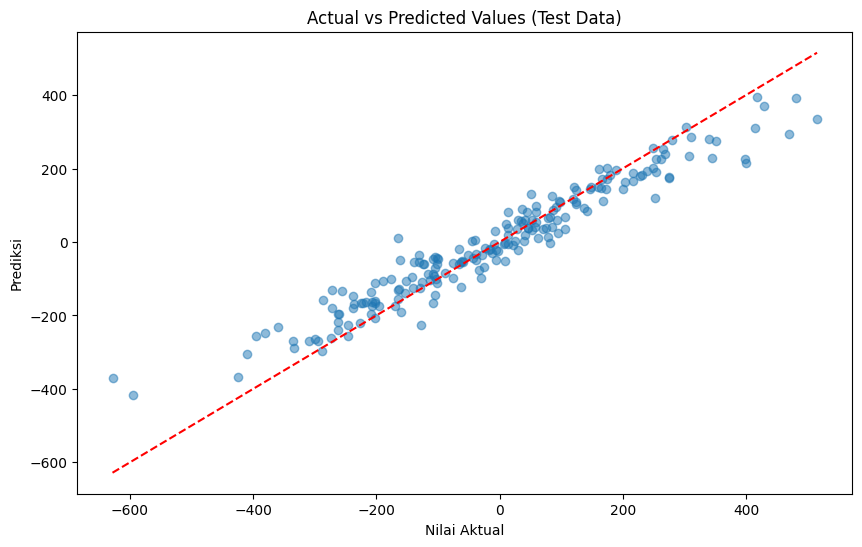

In [65]:
import matplotlib.pyplot as plt

# Plot prediksi vs nilai aktual untuk data test
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")  # Garis referensi
plt.xlabel("Nilai Aktual")
plt.ylabel("Prediksi")
plt.title("Actual vs Predicted Values (Test Data)")
plt.show()

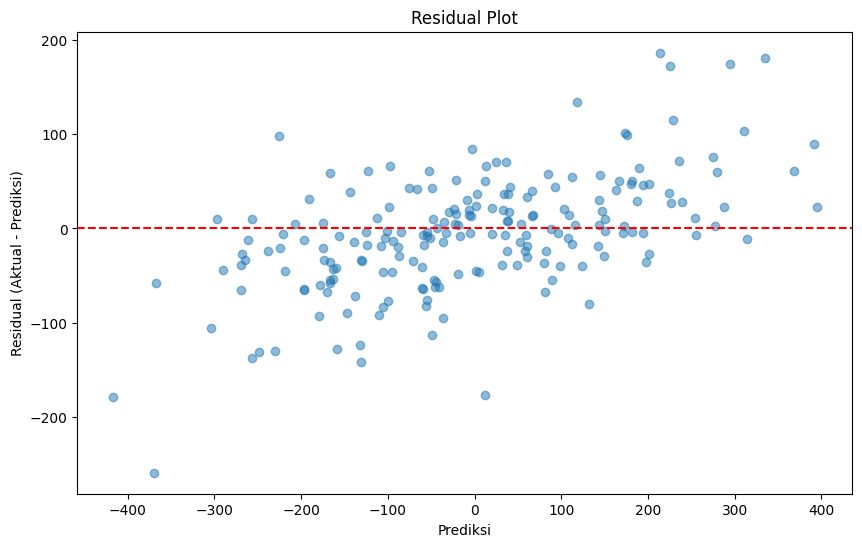

In [66]:
# Hitung residual
residuals = y_test - y_test_pred

# Plot residual
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Prediksi")
plt.ylabel("Residual (Aktual - Prediksi)")
plt.title("Residual Plot")
plt.show()